In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load first dataset

In [91]:
df1=pd.read_csv('data_for_DL.csv')


In [92]:
df1

,Unnamed: 0,Rating,Review
0,0,5.0,I feel so LUCKY to have found this used (phone...
1,1,4.0,"nice phone, nice up grade from my pantach revu..."
2,2,4.0,It works good but it goes slow sometimes but i...
3,3,4.0,Great phone to replace my lost phone. The only...
4,4,1.0,I already had a phone with problems... I know ...
...,...,...,...
212411,212411,4.0,Really Nice
212412,212412,4.0,Delightful
212413,212413,4.0,Nice product
212414,212414,4.0,Very Good


In [93]:
df1.drop(columns='Unnamed: 0')

,Rating,Review
0,5.0,I feel so LUCKY to have found this used (phone...
1,4.0,"nice phone, nice up grade from my pantach revu..."
2,4.0,It works good but it goes slow sometimes but i...
3,4.0,Great phone to replace my lost phone. The only...
4,1.0,I already had a phone with problems... I know ...
...,...,...
212411,4.0,Really Nice
212412,4.0,Delightful
212413,4.0,Nice product
212414,4.0,Very Good


## Load second dataset

In [94]:
df2=pd.read_csv('amazon_food_clean.csv')

In [95]:
df2

,Unnamed: 0,Review,Rating
0,0,I have bought several of the Vitality canned d...,5
1,1,Product arrived labeled as Jumbo Salted Peanut...,1
2,2,This is a confection that has been around a fe...,4
3,3,If you are looking for the secret ingredient i...,2
4,4,Great taffy at a great price. There was a wid...,5
...,...,...,...
393278,393479,Great for sesame chicken..this is a good if no...,5
393279,393480,I'm disappointed with the flavor. The chocolat...,2
393280,393481,"These stars are small, so you can give 10-15 o...",5
393281,393482,These are the BEST treats for training and rew...,5


In [96]:
df2.drop(columns='Unnamed: 0')

,Review,Rating
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5
...,...,...
393278,Great for sesame chicken..this is a good if no...,5
393279,I'm disappointed with the flavor. The chocolat...,2
393280,"These stars are small, so you can give 10-15 o...",5
393281,These are the BEST treats for training and rew...,5


## Merge both dataset

In [97]:
df = pd.concat([df1, df2], ignore_index=True)

In [98]:
df

,Unnamed: 0,Rating,Review
0,0,5.0,I feel so LUCKY to have found this used (phone...
1,1,4.0,"nice phone, nice up grade from my pantach revu..."
2,2,4.0,It works good but it goes slow sometimes but i...
3,3,4.0,Great phone to replace my lost phone. The only...
4,4,1.0,I already had a phone with problems... I know ...
...,...,...,...
605694,393479,5.0,Great for sesame chicken..this is a good if no...
605695,393480,2.0,I'm disappointed with the flavor. The chocolat...
605696,393481,5.0,"These stars are small, so you can give 10-15 o..."
605697,393482,5.0,These are the BEST treats for training and rew...


In [99]:
df=df.drop(columns='Unnamed: 0')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605699 entries, 0 to 605698
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Rating  605485 non-null  float64
 1   Review  604868 non-null  object 
dtypes: float64(1), object(1)
memory usage: 9.2+ MB


## removing null , duplicate , non english rows

In [60]:
df = df.dropna(subset=['Review'])
df = df.dropna(subset=['Rating'])

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
conflicting_reviews = df.groupby('Review')['Rating'].nunique()
conflicting_reviews = conflicting_reviews[conflicting_reviews > 1].index
df = df[df['Review'].isin(conflicting_reviews) == False]

In [63]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [64]:
df.reset_index(drop=True, inplace=True)

In [65]:
df

,Rating,Review
0,2.0,I received the phone in record time however it...
1,5.0,I found very good is 100% recommended hope to ...
2,1.0,"Bought phone April 30, screen went completely ..."
3,5.0,I ordered this phone for a friend and she is t...
4,3.0,The charger that came with the phone causes th...
...,...,...
590874,5.0,Great for sesame chicken..this is a good if no...
590875,2.0,I'm disappointed with the flavor. The chocolat...
590876,5.0,"These stars are small, so you can give 10-15 o..."
590877,5.0,These are the BEST treats for training and rew...


In [66]:
df['Rating'].value_counts()

Rating
5.0    347726
4.0     88097
1.0     71319
3.0     48676
2.0     35061
Name: count, dtype: int64

In [ ]:
import pandas as pd
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException


def detect_language(text):
    try:
        return detect(str(text))
    except LangDetectException:
        return 'unknown'

# Apply language detection
df['language'] = df['Review'].apply(detect_language)


In [ ]:
# Count non-English reviews
non_english_count = df[df['language'] != 'en'].shape[0]


language_counts = df['language'].value_counts()

print("Non-English reviews:", non_english_count)
print("\nLanguage distribution:\n", language_counts)


Non-English reviews: 10816

Language distribution:
 language
en         197598
es           2940
af           1133
fr            971
ca            719
ro            610
de            535
pt            450
it            379
so            377
no            320
nl            283
da            237
cy            218
tl            201
sl            196
et            168
vi            138
sv            122
unknown        98
sq             95
id             89
hr             88
pl             73
sk             72
hu             66
fi             58
sw             49
tr             49
cs             44
lt             17
lv             16
uk              3
ru              2
Name: count, dtype: int64


In [ ]:
df = df[df['language'] == 'en'].drop(columns=['language'])

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df

,Rating,Review
0,2.0,I received the phone in record time however it...
1,5.0,I found very good is 100% recommended hope to ...
2,1.0,"Bought phone April 30, screen went completely ..."
3,5.0,I ordered this phone for a friend and she is t...
4,3.0,The charger that came with the phone causes th...
...,...,...
197593,5.0,Works great; fast shipping!
197594,4.0,I love it! It is cool looking and durable.
197595,5.0,I received the phone with operation manual boo...
197596,1.0,Defective! !!!!!! On arrival. This device came...


In [24]:
df['Rating'].value_counts()

Rating
5.0    97191
1.0    35072
4.0    32113
3.0    18944
2.0    14278
Name: count, dtype: int64

## Create Balanced and Imbalanced dataset

In [72]:
#creating balanced data
balanced_df = df.groupby('Rating').apply(lambda x: x.sample(n=23000, random_state=42)).reset_index(drop=True)

#adding a column key
df['key'] = df.astype(str).agg('-'.join, axis=1)
balanced_df['key'] = balanced_df.astype(str).agg('-'.join, axis=1)

# Remove balanced rows to get remaining using key column
remaining_df = df[~df['key'].isin(balanced_df['key'])].drop(columns='key')
balanced_df = balanced_df.drop(columns='key')


base_2_star = 12000



target_counts = {
    2: base_2_star,                # 1x
    1: int(2.5 * base_2_star),     # 1.5x
    3: int(1.5 * base_2_star),       # 2.5x
    4: int(2 * base_2_star),       # 3x
    5: int(3 * base_2_star),       # 2x
}


imbalanced_parts = []

for rating, target in target_counts.items():
    subset = remaining_df[remaining_df['Rating'] == rating]
    replace = target > len(subset)  # only upsample if not enough data
    sampled = subset.sample(n=target, replace=replace, random_state=42)
    imbalanced_parts.append(sampled)


imbalanced_df = pd.concat(imbalanced_parts).reset_index(drop=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25720\161291977.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Rating').apply(lambda x: x.sample(n=23000, random_state=42)).reset_index(drop=True)


In [73]:
# Check overlap between balanced and imbalanced datasets
overlap = pd.merge(balanced_df, imbalanced_df, how='inner')
print("Number of duplicate rows between balanced and imbalanced:", len(overlap))

Number of duplicate rows between balanced and imbalanced: 0


In [84]:
# Shuffle the balanced DataFrame
imbalanced_df = imbalanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [83]:
balanced_df

,Rating,Review
0,4.0,I love the fabric of this shirt -- it's super ...
1,5.0,Very tasty cheese flavor. Because of crunch an...
2,5.0,My little Yorkie loves these. She eats the swe...
3,2.0,"The product is not bad, but the olive taste is..."
4,2.0,IT WAS FREE WITH A GREAT MEMORY FOAM MATTRESS ...
...,...,...
114995,4.0,I finally decided it was time to go for decaff...
114996,5.0,I love vegetable root chips but the brands you...
114997,5.0,This is really one of those items that hits it...
114998,1.0,Piss poor the phone is nothing i expected. Wou...


In [86]:
imbalanced_df

,Rating,Review
0,4.0,Very good tea - the tea is milder than expecte...
1,4.0,I bought two of these they all disappointed .
2,3.0,The ones I got were the usual 46 oz boxes with...
3,2.0,They're OK. They're very salty. By far not a...
4,1.0,I am used to other Russian Caravan blends whic...
...,...,...
119995,5.0,These Newtons Fruit thins are a great tasting ...
119996,5.0,its working great so far and my mom love it. T...
119997,5.0,"So I'm from New York, but am working at an int..."
119998,2.0,"The bag is cute, definitely cannot hold anythi..."


## Visualization of balanced dataset

In [76]:
balanced_df['Rating'].value_counts()

Rating
1.0    23000
2.0    23000
3.0    23000
4.0    23000
5.0    23000
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25720\2428083184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=balanced_df, palette='viridis')


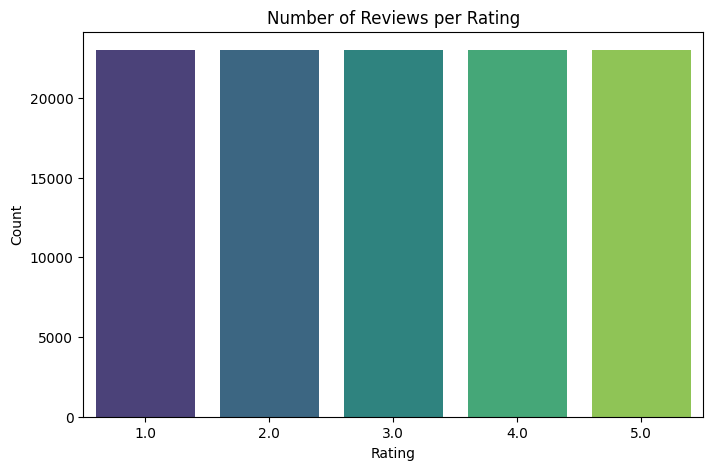

In [77]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=balanced_df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

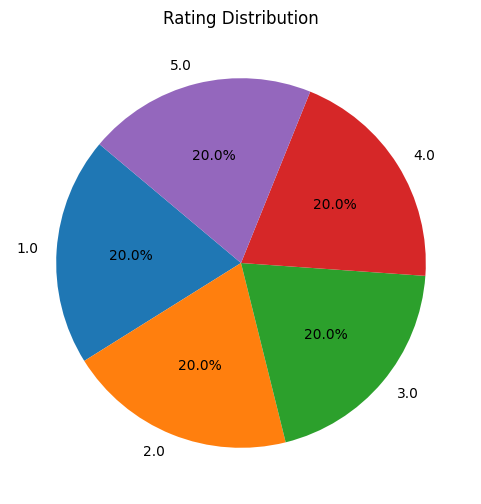

In [78]:
rating_counts = balanced_df['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()

## Visualization of imbalanced dataset

In [79]:
imbalanced_df['Rating'].value_counts()

Rating
5.0    36000
1.0    30000
4.0    24000
3.0    18000
2.0    12000
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25720\2685128881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=imbalanced_df, palette='viridis')


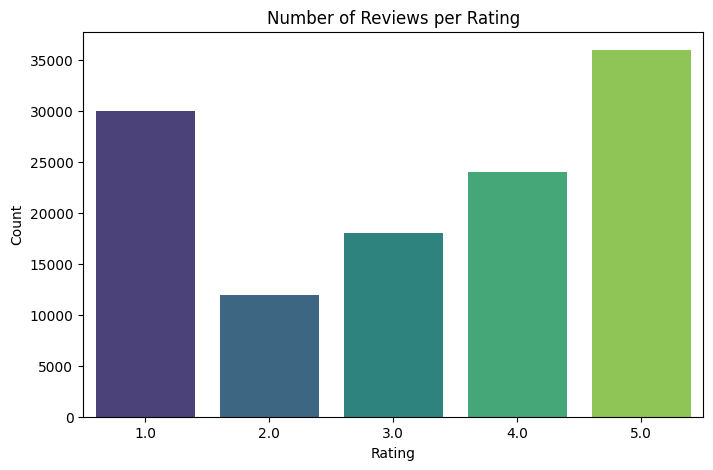

In [80]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=imbalanced_df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

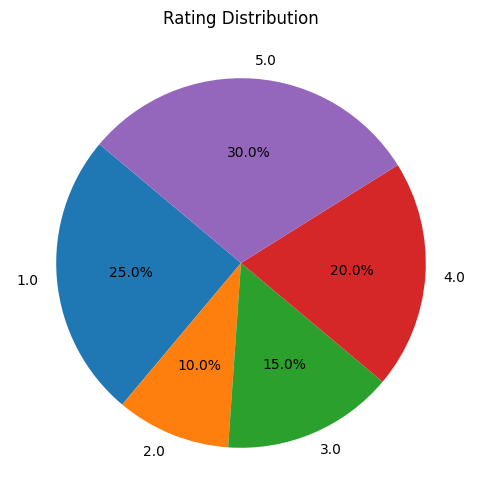

In [81]:
rating_counts = imbalanced_df['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()

## save both dataset

In [87]:
balanced_df.to_csv("balanced_data_for_DL.csv", encoding="utf-8-sig")

In [88]:
imbalanced_df.to_csv("imbalanced_data_for_DL.csv", encoding="utf-8-sig")

In [89]:
df.to_csv("merged_data.csv", encoding="utf-8-sig")